In [40]:
from scipy.io import wavfile
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [4]:
samplerate, data = wavfile.read('contents/19000020.wav')
data_norm = [(elem/(2**15. - 1)) if elem > 0 else (elem/(2**15.)) for elem in data] # this is 16-bit track, b is now normalized on [-1,1)

/home/cernmadworker/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: WavFileWarning: Reached EOF prematurely; finished at 14860332 bytes, expected 14860337 bytes from header.
  """Entry point for launching an IPython kernel.


In [14]:
T = data.shape[0] / samplerate  # duration of a signal(673s)
time = np.linspace(0., T, data.shape[0])
'''
plt.plot(time, data_norm, label="wave")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.savefig('contents/1.png')
plt.show()
'''
k = np.arange(len(data))
frqLabel = k/T
c = fft(data_norm)
'''
plt.plot(frqLabel,abs(c),'r') 
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.savefig('contents/2.png')
plt.show()
'''

'\nplt.plot(frqLabel,abs(c),\'r\') \nplt.xlabel("frequency")\nplt.ylabel("Amplitude")\nplt.savefig(\'spectrum of a signal.png\')\nplt.show()\n'

In [24]:
M = max(abs(c))
fc = np.where(abs(c) == M)[0][0]
fc = fc / len(c) * samplerate

![title](contents/1.png)
![title](contents/2.png)

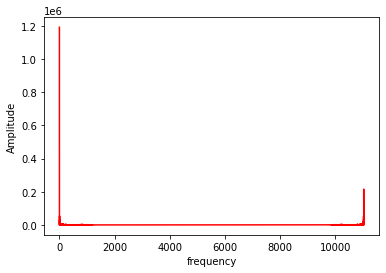

In [33]:
#  demodulation
y = np.fabs(data_norm)
ffty = fft(y)
ff = int(fc / 2 / samplerate * len(ffty))
ffty[ff : len(ffty) - ff] = 0
plt.plot(frqLabel,abs(ffty),'r') 
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.savefig('contents/3.png')
plt.show()

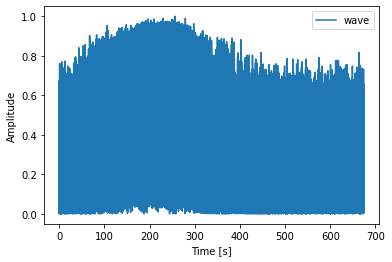

In [36]:
output_data = abs(ifft(ffty))
output_data = output_data / max(output_data)
plt.plot(time, output_data, label="demodulated wave")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.savefig('contents/4.png')
plt.show()

NameError: name 'matrix' is not defined